In [1]:
import sys
import glob
import os
sys.path.append("..")

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
from sklearn.model_selection import train_test_split
from util.StockDataset import StockData
from hmmlearn.hmm import GaussianHMM
from util.util import evaluate
from GHMM import GHMM

In [56]:
appl_mse = []
appl_rmse = []
appl_mape = []

jnj_mse = []
jnj_rmse = []
jnj_mape = []

tsla_mse = []
tsla_rmse = []
tsla_mape = []

xom_mse = []
xom_rmse = []
xom_mape = []

In [57]:
def collecting_results(folder, test_size, plot=False):
    files = glob.glob(folder + '*')
    if plot:
        for i in range(5):
            for f in files:
                if f.find('.') != -1:
                    f = f.split(folder)[-1].split(".")[-2]
                f = f.replace('-', '.')
                predictor = GHMM(hs=i)
                df = pd.read_csv(folder + f + '.csv', 
                                    parse_dates=True, 
                                    index_col='Date').dropna(how="any")
                X_train = df[:len(df)-test_size]
                X_test = df[-test_size:]
                predictor.fit(X_train)
                y_pred = predictor.predict(X_test, plot=False)

                days = np.array(X_test.index, dtype="datetime64[ms]")
        
                fig = plt.figure()
        
                axes = fig.add_subplot(111)
                axes.plot(days, X_test['Close'], 'bo-', label="actual")
                axes.plot(days, y_pred, 'r+-', label="predicted")
        
                fig.autofmt_xdate()
                plt.title(f)
                plt.legend()
                plt.savefig("../../results/probabilistic/" + f + ".png", dpi=300)
    else:
        for i in range(5):
            for f in files:
                if f.find('.') != -1:
                    f = f.split(folder)[-1].split(".")[-2]
                f = f.replace('-', '.')
                predictor = GHMM(hs=10)
                df = pd.read_csv(folder + f + '.csv', 
                                    parse_dates=True, 
                                    index_col='Date').dropna(how="any")
                X_train = df[:len(df)-test_size]
                X_test = df[-test_size:]
                predictor.fit(X_train)
                y_pred = predictor.predict(X_test, plot=False)
                print(f)
                mse, rmse, mape = evaluate(y_test=X_test['Close'], y_pred=y_pred)

                if f == "AAPL": 
                    appl_mse.append(mse)
                    appl_rmse.append(rmse)
                    appl_mape.append(mape)

                if f == "TSLA": 
                    tsla_mse.append(mse)
                    tsla_rmse.append(rmse)
                    tsla_mape.append(mape)

                if f == "XOM": 
                    xom_mse.append(mse)
                    xom_rmse.append(rmse)
                    xom_mape.append(mape)

                if f == "JNJ": 
                    jnj_mse.append(mse)
                    jnj_rmse.append(rmse)
                    jnj_mape.append(mape)

In [58]:
collecting_results('../../stock/', 60, plot=False)

  0%|          | 0/60 [00:00<?, ?it/s]

XOM


  0%|          | 0/60 [00:00<?, ?it/s]

JNJ


  0%|          | 0/60 [00:00<?, ?it/s]

TSLA


  0%|          | 0/60 [00:00<?, ?it/s]

AAPL


  0%|          | 0/60 [00:00<?, ?it/s]

XOM


  0%|          | 0/60 [00:00<?, ?it/s]

JNJ


  0%|          | 0/60 [00:00<?, ?it/s]

TSLA


  0%|          | 0/60 [00:00<?, ?it/s]

AAPL


  0%|          | 0/60 [00:00<?, ?it/s]

XOM


  0%|          | 0/60 [00:00<?, ?it/s]

JNJ


  0%|          | 0/60 [00:00<?, ?it/s]

TSLA


  0%|          | 0/60 [00:00<?, ?it/s]

AAPL


  0%|          | 0/60 [00:00<?, ?it/s]

XOM


  0%|          | 0/60 [00:00<?, ?it/s]

JNJ


  0%|          | 0/60 [00:00<?, ?it/s]

TSLA


  0%|          | 0/60 [00:00<?, ?it/s]

AAPL


  0%|          | 0/60 [00:00<?, ?it/s]

XOM


  0%|          | 0/60 [00:00<?, ?it/s]

JNJ


  0%|          | 0/60 [00:00<?, ?it/s]

TSLA


  0%|          | 0/60 [00:00<?, ?it/s]

AAPL


In [3]:
df = pd.read_csv('../../stock/AAPL.csv', parse_dates=True, index_col='Date').dropna(how='any')
X_train = df[:len(df)-60]
X_test = df[-60:]

In [4]:
predictor = GHMM(hs=10, fc=20, fh=10, fl=10)
predictor.fit(X_train)

In [5]:
y_pred = predictor.predict(X_test, plot=False)

  0%|          | 0/60 [00:00<?, ?it/s]

In [8]:
evaluate(y_test=X_test['Close'], y_pred=y_pred, show=True)

Model Performance
Mean squared error = 9.554
Root mean squared error = 3.091
Mean absolute percentage error = 1.759%.


ValueError: x, y, and format string must not be None

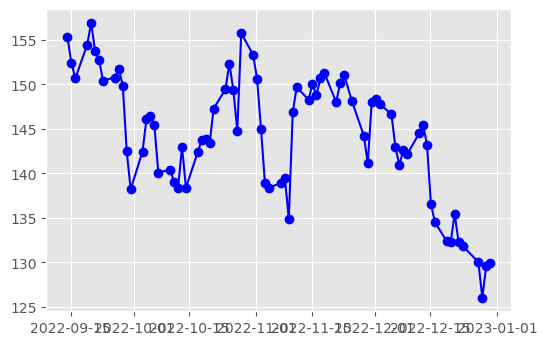

In [8]:
days = np.array(X_test.index, dtype="datetime64[ms]")
 
fig = plt.figure()
 
axes = fig.add_subplot(111)
axes.plot(days, X_test['Close'], 'bo-', label="actual")
axes.plot(days, y_pred, 'r+-', label="predicted")
 
fig.autofmt_xdate()
plt.legend()

In [62]:
appl_mse = np.array(appl_mse)
appl_rmse = np.array(appl_rmse)
appl_mape = np.array(appl_mape)

jnj_mse = np.array(jnj_mse)
jnj_rmse = np.array(jnj_rmse)
jnj_mape = np.array(jnj_mape)

tsla_mse = np.array(tsla_mse)
tsla_rmse = np.array(tsla_rmse)
tsla_mape = np.array(tsla_mape)

xom_mse = np.array(xom_mse)
xom_rmse = np.array(xom_rmse)
xom_mape = np.array(xom_mape)

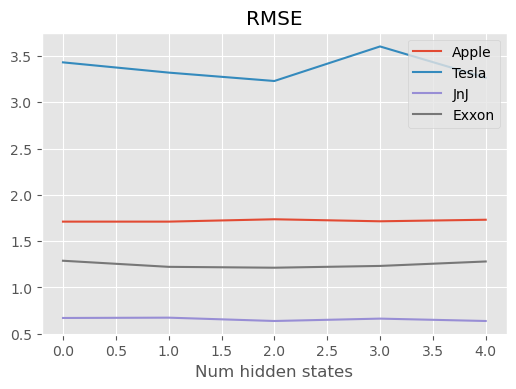

In [61]:
x = np.array(list(range(5)))

fig = plt.figure()
    
axes = fig.add_subplot(111)
plt.title("RMSE")
plt.xlabel("Num hidden states")
axes.plot(x, appl_mape, label="Apple")
axes.plot(x, tsla_mape, label="Tesla")
axes.plot(x, jnj_mape, label="JnJ")
axes.plot(x, xom_mape, label="Exxon")

plt.legend()
plt.savefig("../../results/probabilistic/" + "RMSE" + ".png", dpi=300)